<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equation - Initial Value Problems
Differential equations are the relationships between a function and its derivatives



## Ordinary Differential Equation (ODE) Initial Value Problem Statement

An ordinary differential equation is a differential equation where the independent variable and the derivatives are in one dimension
A partial differential equation is a general form differential equation where $x$ is a verctor containing the independent variables:
$x_1,x_2,x_3,...,x_m$

Finding a solution to an ODE given an initial value is called the intial value problem.


## Reduction of Order
Many numerical methods for solving inital value problems are designed specifically to solve first-order differential equations.
To make these solvers useful for higher ordeer differential equations you often reduce the order of the differential equation to first order.



Consider S(t) which is a vector that describes the state of a systrem as a function of time. Its a collection of all of the dependent variables. Essentially you are turning an $n^{th}$ order ODE into $n$ first ODEs that are coupled together.


A linear ODE is one that is like
$\frac{dy}{dx} + P(x)y = Q(x)$


## The Euler Method

The linear approximation of $S(t)$ around $t_j$ at $t_j+1$ is

$S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt}$
This is called the explicit Eueler Fomrula



<ipython-input-15-fe10eab32bab>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


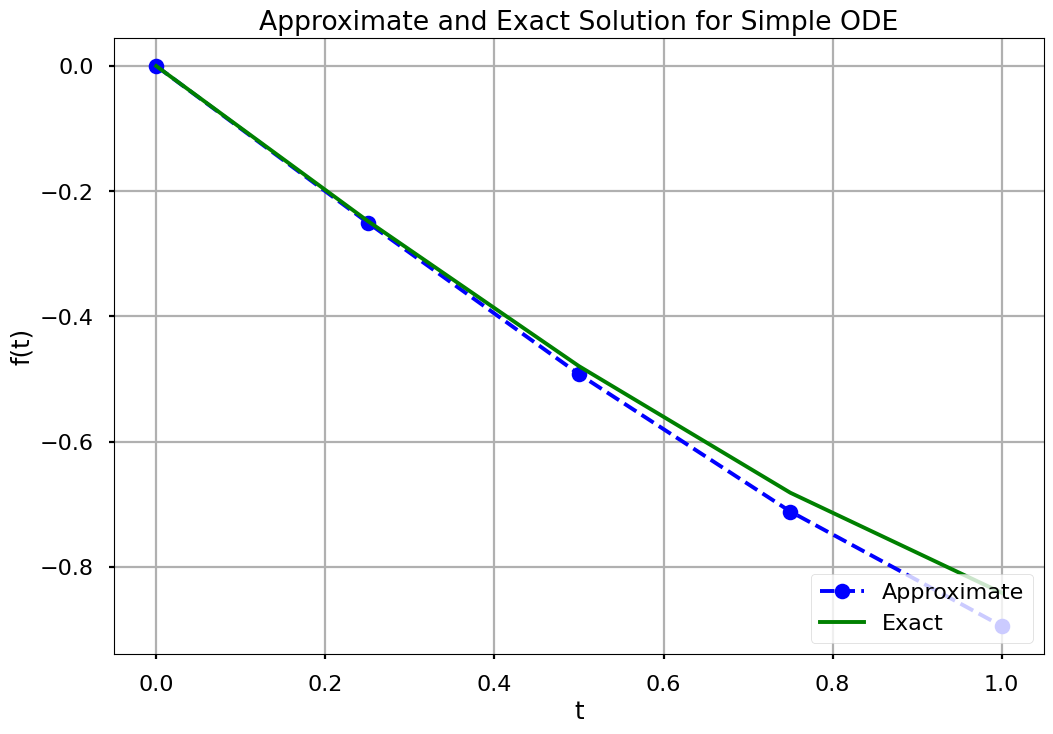

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: -np.cos(-t) # ODE
h = 0.25 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sin(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

<ipython-input-16-166be2c8e8b0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


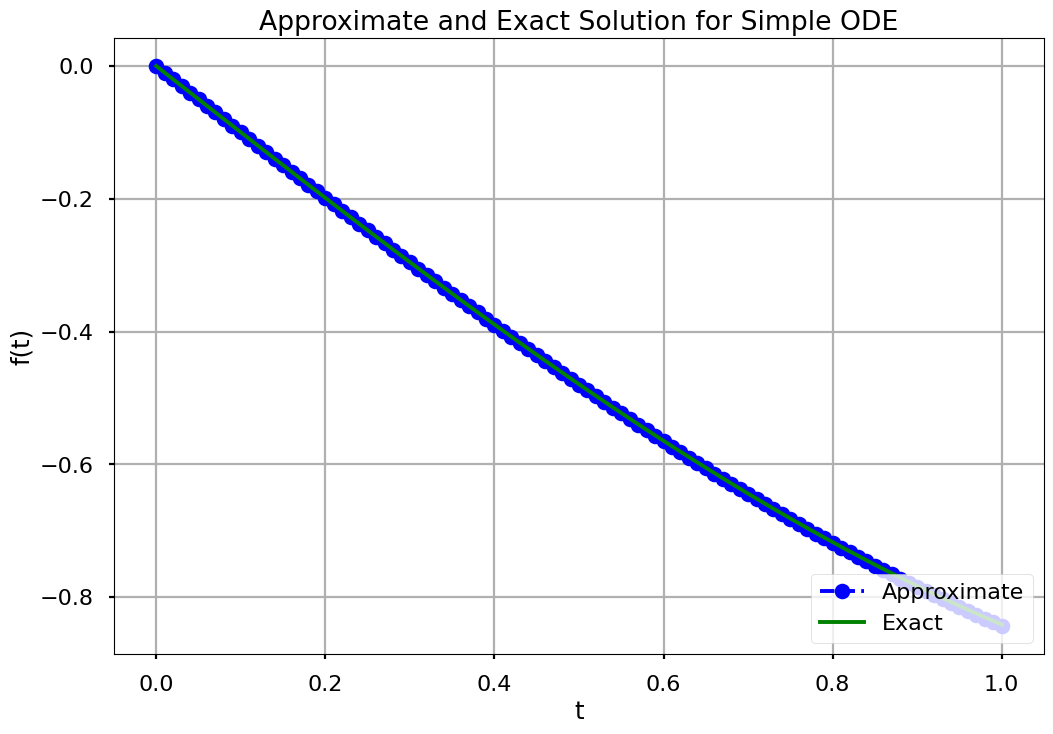

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: -np.cos(-t) # ODE
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sin(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
#If we reduce the step-size the approximate gets closer to the exact